In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_df = pd.read_csv('./train.csv')
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


【問題1】練習のために特徴量の選択
----
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [379]:
train_df_explain = train_df.loc[:, ['GrLivArea', 'YearBuilt']]
train_df_target = train_df.loc[:, ['SalePrice']]

train_df_explain_exp_tar = pd.merge(train_df_target, train_df_explain, left_index=True , right_index=True)

train_df_target

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [380]:
train_df_explain

,GrLivArea,YearBuilt
0,1710,2003
1,1262,1976
2,1786,2001
3,1717,1915
4,2198,2000
...,...,...
1455,1647,1999
1456,2073,1978
1457,2340,1941
1458,1078,1950


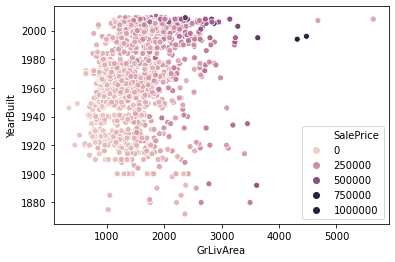

In [381]:
sns.scatterplot(x='GrLivArea', y='YearBuilt', data=train_df, hue='SalePrice')

In [382]:
from sklearn import preprocessing

#標準化の実施
ss = preprocessing.StandardScaler()

train_df_explain_exp_tar_standardization = ss.fit_transform(train_df_explain_exp_tar)
type(train_df_explain_exp_tar_standardization)

numpy.ndarray

In [383]:
train_df_explain_exp_tar_standardization

array([[ 0.34727322,  0.37033344,  1.05099379],
       [ 0.00728832, -0.48251191,  0.15673371],
       [ 0.53615372,  0.51501256,  0.9847523 ],
       ...,
       [ 1.07761115,  1.56964722, -1.00249232],
       [-0.48852299, -0.83278768, -0.70440562],
       [-0.42084081, -0.49393395, -0.20759447]])

In [384]:
train_df_explain_exp_tar_standardization = pd.DataFrame(train_df_explain_exp_tar_standardization)

In [385]:
train_df_explain_exp_tar_standardization

,0,1,2
0,0.347273,0.370333,1.050994
1,0.007288,-0.482512,0.156734
2,0.536154,0.515013,0.984752
3,-0.515281,0.383659,-1.863632
4,0.869843,1.299326,0.951632
...,...,...,...
1455,-0.074560,0.250402,0.918511
1456,0.366161,1.061367,0.222975
1457,1.077611,1.569647,-1.002492
1458,-0.488523,-0.832788,-0.704406


In [386]:
train_df_explain_exp_tar_standardization.loc[:,[0,1]]

,0,1
0,0.347273,0.370333
1,0.007288,-0.482512
2,0.536154,0.515013
3,-0.515281,0.383659
4,0.869843,1.299326
...,...,...
1455,-0.074560,0.250402
1456,0.366161,1.061367
1457,1.077611,1.569647
1458,-0.488523,-0.832788


学習、推定
---
線形回帰による学習と推定まで実行

In [436]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
from sklearn.model_selection import train_test_split #テストデータと訓練データを分けるためのメソッド
from sklearn import metrics
clf = linear_model.LinearRegression()

#データとレーニング用とテスト用に分ける
X_train, X_test, Y_train, Y_test = train_test_split(train_df_explain_exp_tar.loc[:,['GrLivArea', 'YearBuilt']], train_df_explain_exp_tar.loc[:,['SalePrice']]) #トレーニングデータとテストデータに分ける


# 説明変数に "density (濃度)" を利用
X = X_train
 
# 目的変数に "alcohol (アルコール度数)" を利用
Y = Y_train
 
# 予測モデルを作成
clf.fit(X, Y)

Y_pred = clf.predict(X_test)
 
# 回帰係数
print(clf.coef_)
 
# 切片 (誤差)
print(clf.intercept_)
 
# 決定係数
print(clf.score(X, Y))

[[  93.93681914 1012.10652456]]
[-1957388.0059369]
0.6513592202471676


In [437]:
print(X_test.shape)
print(type(X_test))
print(X_test)
print(X_test['GrLivArea'])

(365, 2)
<class 'pandas.core.frame.DataFrame'>
      GrLivArea  YearBuilt
863        1148       1959
283        1468       2008
606        1040       1996
52          816       1963
51         1176       1934
...         ...        ...
540        1838       2006
1358       1573       2000
623        1512       2000
242        1440       1900
746        2256       2000

[365 rows x 2 columns]
863     1148
283     1468
606     1040
52       816
51      1176
        ... 
540     1838
1358    1573
623     1512
242     1440
746     2256
Name: GrLivArea, Length: 365, dtype: int64


評価の実行
---
>評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。



- 公式ドキュメント：　https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
- 参考文献：　https://funatsu-lab.github.io/open-course-ware/basic-theory/accuracy-index/

y_test.values.tolist() DataFrameをarray型に変更

MESによる評価：
----

In [465]:
from sklearn.metrics import mean_squared_error
#平均二乗誤差 (MSE)の実行
print('MESは{}'.format(mean_squared_error(Y_test, Y_pred)))
lr = mean_squared_error(Y_test, Y_pred)

MESは2095630423.3928702


出てきた結果の可視化
---
>可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

In [439]:
Y_pred_df = pd.DataFrame(Y_pred)
print(type(Y_pred_df))
print(Y_pred_df.shape)
Y_pred_df = Y_pred_df[:-1]
print(Y_pred_df.shape)
print(Y_pred_df)

print(X_test.shape)
print(X_test)

<class 'pandas.core.frame.DataFrame'>
(365, 1)
(364, 1)
                 0
0    133168.144048
1    212821.145876
2    160470.908989
3    106029.546191
4    110495.711870
..             ...
359  172585.845923
360  245553.555909
361  214587.659689
362  208857.513722
363  100883.410288

[364 rows x 1 columns]
(365, 2)
      GrLivArea  YearBuilt
863        1148       1959
283        1468       2008
606        1040       1996
52          816       1963
51         1176       1934
...         ...        ...
540        1838       2006
1358       1573       2000
623        1512       2000
242        1440       1900
746        2256       2000

[365 rows x 2 columns]


In [440]:
X_test

,GrLivArea,YearBuilt
863,1148,1959
283,1468,2008
606,1040,1996
52,816,1963
51,1176,1934
...,...,...
540,1838,2006
1358,1573,2000
623,1512,2000
242,1440,1900


In [445]:
print(X_test['GrLivArea'])
print(X_test['GrLivArea'].shape)
print(type(X_test['GrLivArea']))


print('Y_pred_dfにデータ型は{}',format(type(Y_pred_df)))
print('Y_predのデータ型は{}',format(type(Y_pred)))

863     1148
283     1468
606     1040
52       816
51      1176
        ... 
540     1838
1358    1573
623     1512
242     1440
746     2256
Name: GrLivArea, Length: 365, dtype: int64
(365,)
<class 'pandas.core.series.Series'>
Y_pred_dfにデータ型は{} <class 'pandas.core.frame.DataFrame'>
Y_predのデータ型は{} <class 'numpy.ndarray'>


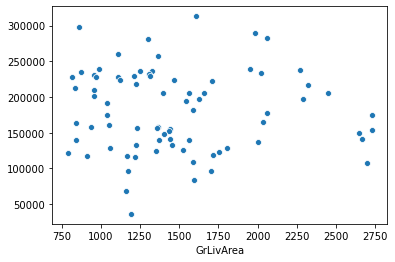

In [446]:
# Y_trainデータの変数と結果

sns.scatterplot(X_test['GrLivArea'],Y_pred_series)

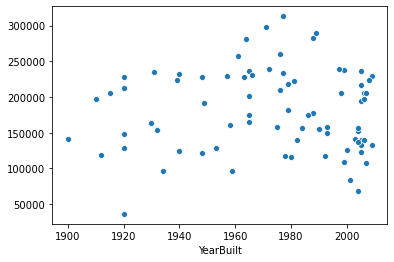

In [447]:
sns.scatterplot(X_test['YearBuilt'],Y_pred_series)

【問題3】手法の比較
---
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。
- 線形回帰
- SVM
- 決定木
- ランダムフォレスト


SVMによる学習・推定・評価・可視化
----

SVMによる学習と推定
----

In [448]:
Y_train_series =  Y_train.loc[:, "SalePrice"]

In [449]:
#SVMの実装
from sklearn.svm import SVC
ｓｖm_model = SVC(gamma='scale')
ｓｖm_model.fit(X_train.round().astype(int), Y_train_series.round().astype(int))
Y_pred_svm = ｓｖm_model.predict(X_test.round().astype(int))

print(pd.DataFrame(Y_test.round().astype(int)[:10]))
print(pd.DataFrame(Y_pred_svm[:10]))

      SalePrice
863      132500
283      244600
606      152000
52       110000
51       114500
1335     167900
1091     160000
1220     115000
313      375000
205      180500
        0
0  140000
1  140000
2  140000
3  140000
4  140000
5  140000
6  140000
7  140000
8  190000
9  140000


正確性の評価
----
metrics.accuracy_score(Y_test, Y_pred)

In [450]:
print('正確性は{}'.format(metrics.accuracy_score(Y_test, Y_pred_svm)))
print('MESは{}'.format(mean_squared_error(Y_test, Y_pred_svm)))
svm = mean_squared_error(Y_test, Y_pred_svm)

正確性は0.0136986301369863
MESは5030872763.769863


混合行列によりSVMの評価
----

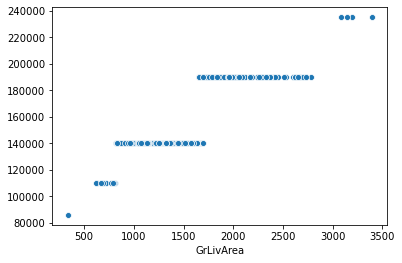

In [451]:
sns.scatterplot(X_test['GrLivArea'],Y_pred_svm)

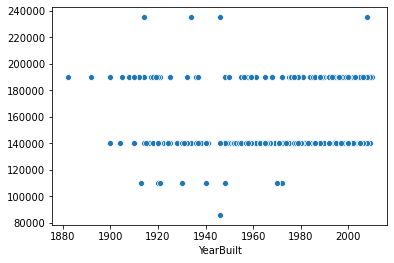

In [452]:
sns.scatterplot(X_test['YearBuilt'],Y_pred_svm)

決定木による学習・推定・評価・可視化
----

学習・推測

In [453]:
#決定木
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
# 学習
clf_tree = clf.fit(X_train.round().astype(int), Y_train_series.round().astype(int))

# 予測
Y_pred_tree = clf_tree.predict(X_test.round().astype(int))

評価：
---

In [454]:
# 評価
print('正確性は{}'.format(metrics.accuracy_score(Y_test, Y_pred_tree)))
print('MESは{}'.format(mean_squared_error(Y_test, Y_pred_tree)))
dt = mean_squared_error(Y_test, Y_pred_tree)

正確性は0.010958904109589041
MESは3854770961.361644


決定木の可視化：
----

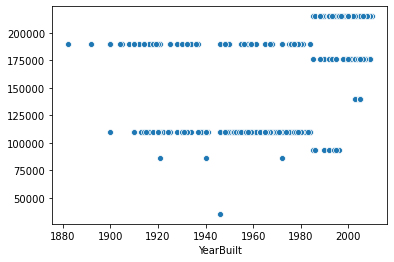

In [455]:
sns.scatterplot(X_test['YearBuilt'],Y_pred_tree)

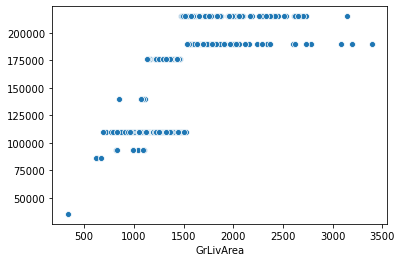

In [456]:
sns.scatterplot(X_test['GrLivArea'],Y_pred_tree)

ランダムフォレストを用いた学習・推定・評価・可視化
====

ランダムフォレストを用いた学習・推定
----

In [457]:
Y_train_series =  Y_train.loc[:, "SalePrice"]
Y_train_series

338     202500
1337     52500
46      239686
1454    185000
1379    167500
         ...  
914     173733
886     145000
697     123500
1185    104900
385     192000
Name: SalePrice, Length: 1095, dtype: int64

In [458]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
random_forest.fit(X_train, Y_train_series)

Y_pred_forest = random_forest.predict(X_test)

accuracy_random_forest = metrics.accuracy_score(Y_test, Y_pred_forest)
print('Accuracy: {}'.format(accuracy_random_forest))

print(X_train.shape)
print(Y_train_series.shape)

Accuracy: 0.005479452054794521
(1095, 2)
(1095,)


ランダムフォレストの評価
---

In [459]:
print('正確性は{}'.format(metrics.accuracy_score(Y_test, Y_pred_forest)))
print('MESは{}'.format(mean_squared_error(Y_test, Y_pred_forest)))
rf = mean_squared_error(Y_test, Y_pred_forest)

正確性は0.005479452054794521
MESは2640798696.317808


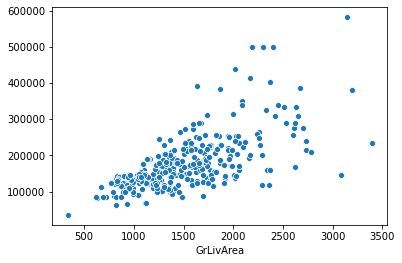

In [460]:
sns.scatterplot(X_test['GrLivArea'],Y_pred_forest)

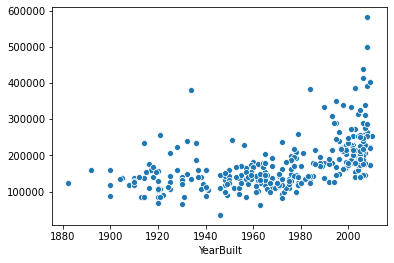

In [461]:
sns.scatterplot(X_test['YearBuilt'],Y_pred_forest)

In [482]:
# metrics = pd.DataFrame([lr, svm, dt, rf]　index='線形回帰', 'サポートベクトルマシン', '決定木','ランダムフォレスト')
# display(metrics)


a_values = [lr]
b_values = svm
c_values = dt
d_values = rf
mes_dic = {"線形回帰": a_values, "サポートベクトルマシン": b_values, "決定木":c_values, "ランダムフォレスト":d_values }
mes_df = pd.DataFrame.from_dict(mes_dic)
mes_df

,線形回帰,サポートベクトルマシン,決定木,ランダムフォレスト
0,2.095630e+09,5.030873e+09,3.854771e+09,2.640799e+09


私の場合は、線形回帰が最も精度が良く、サポートベクトルマシンが最も結果が悪かった。